In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import pearsonr, spearmanr, chi2_contingency, pointbiserialr, f_oneway # f_oneway - ANOVAS

pd.set_option('display.max_columns', None)

In [2]:
carclaims = pd.read_csv('./data/Angoss Knowledge Seeker - carclaims.txt/carclaims_original.csv')

In [3]:
carclaims.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [4]:
carclaims.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days:Policy-Accident    object
Days:Policy-Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange-Claim     object
NumberOfCars            object
Year                     int64
BasePolicy              object
FraudFou

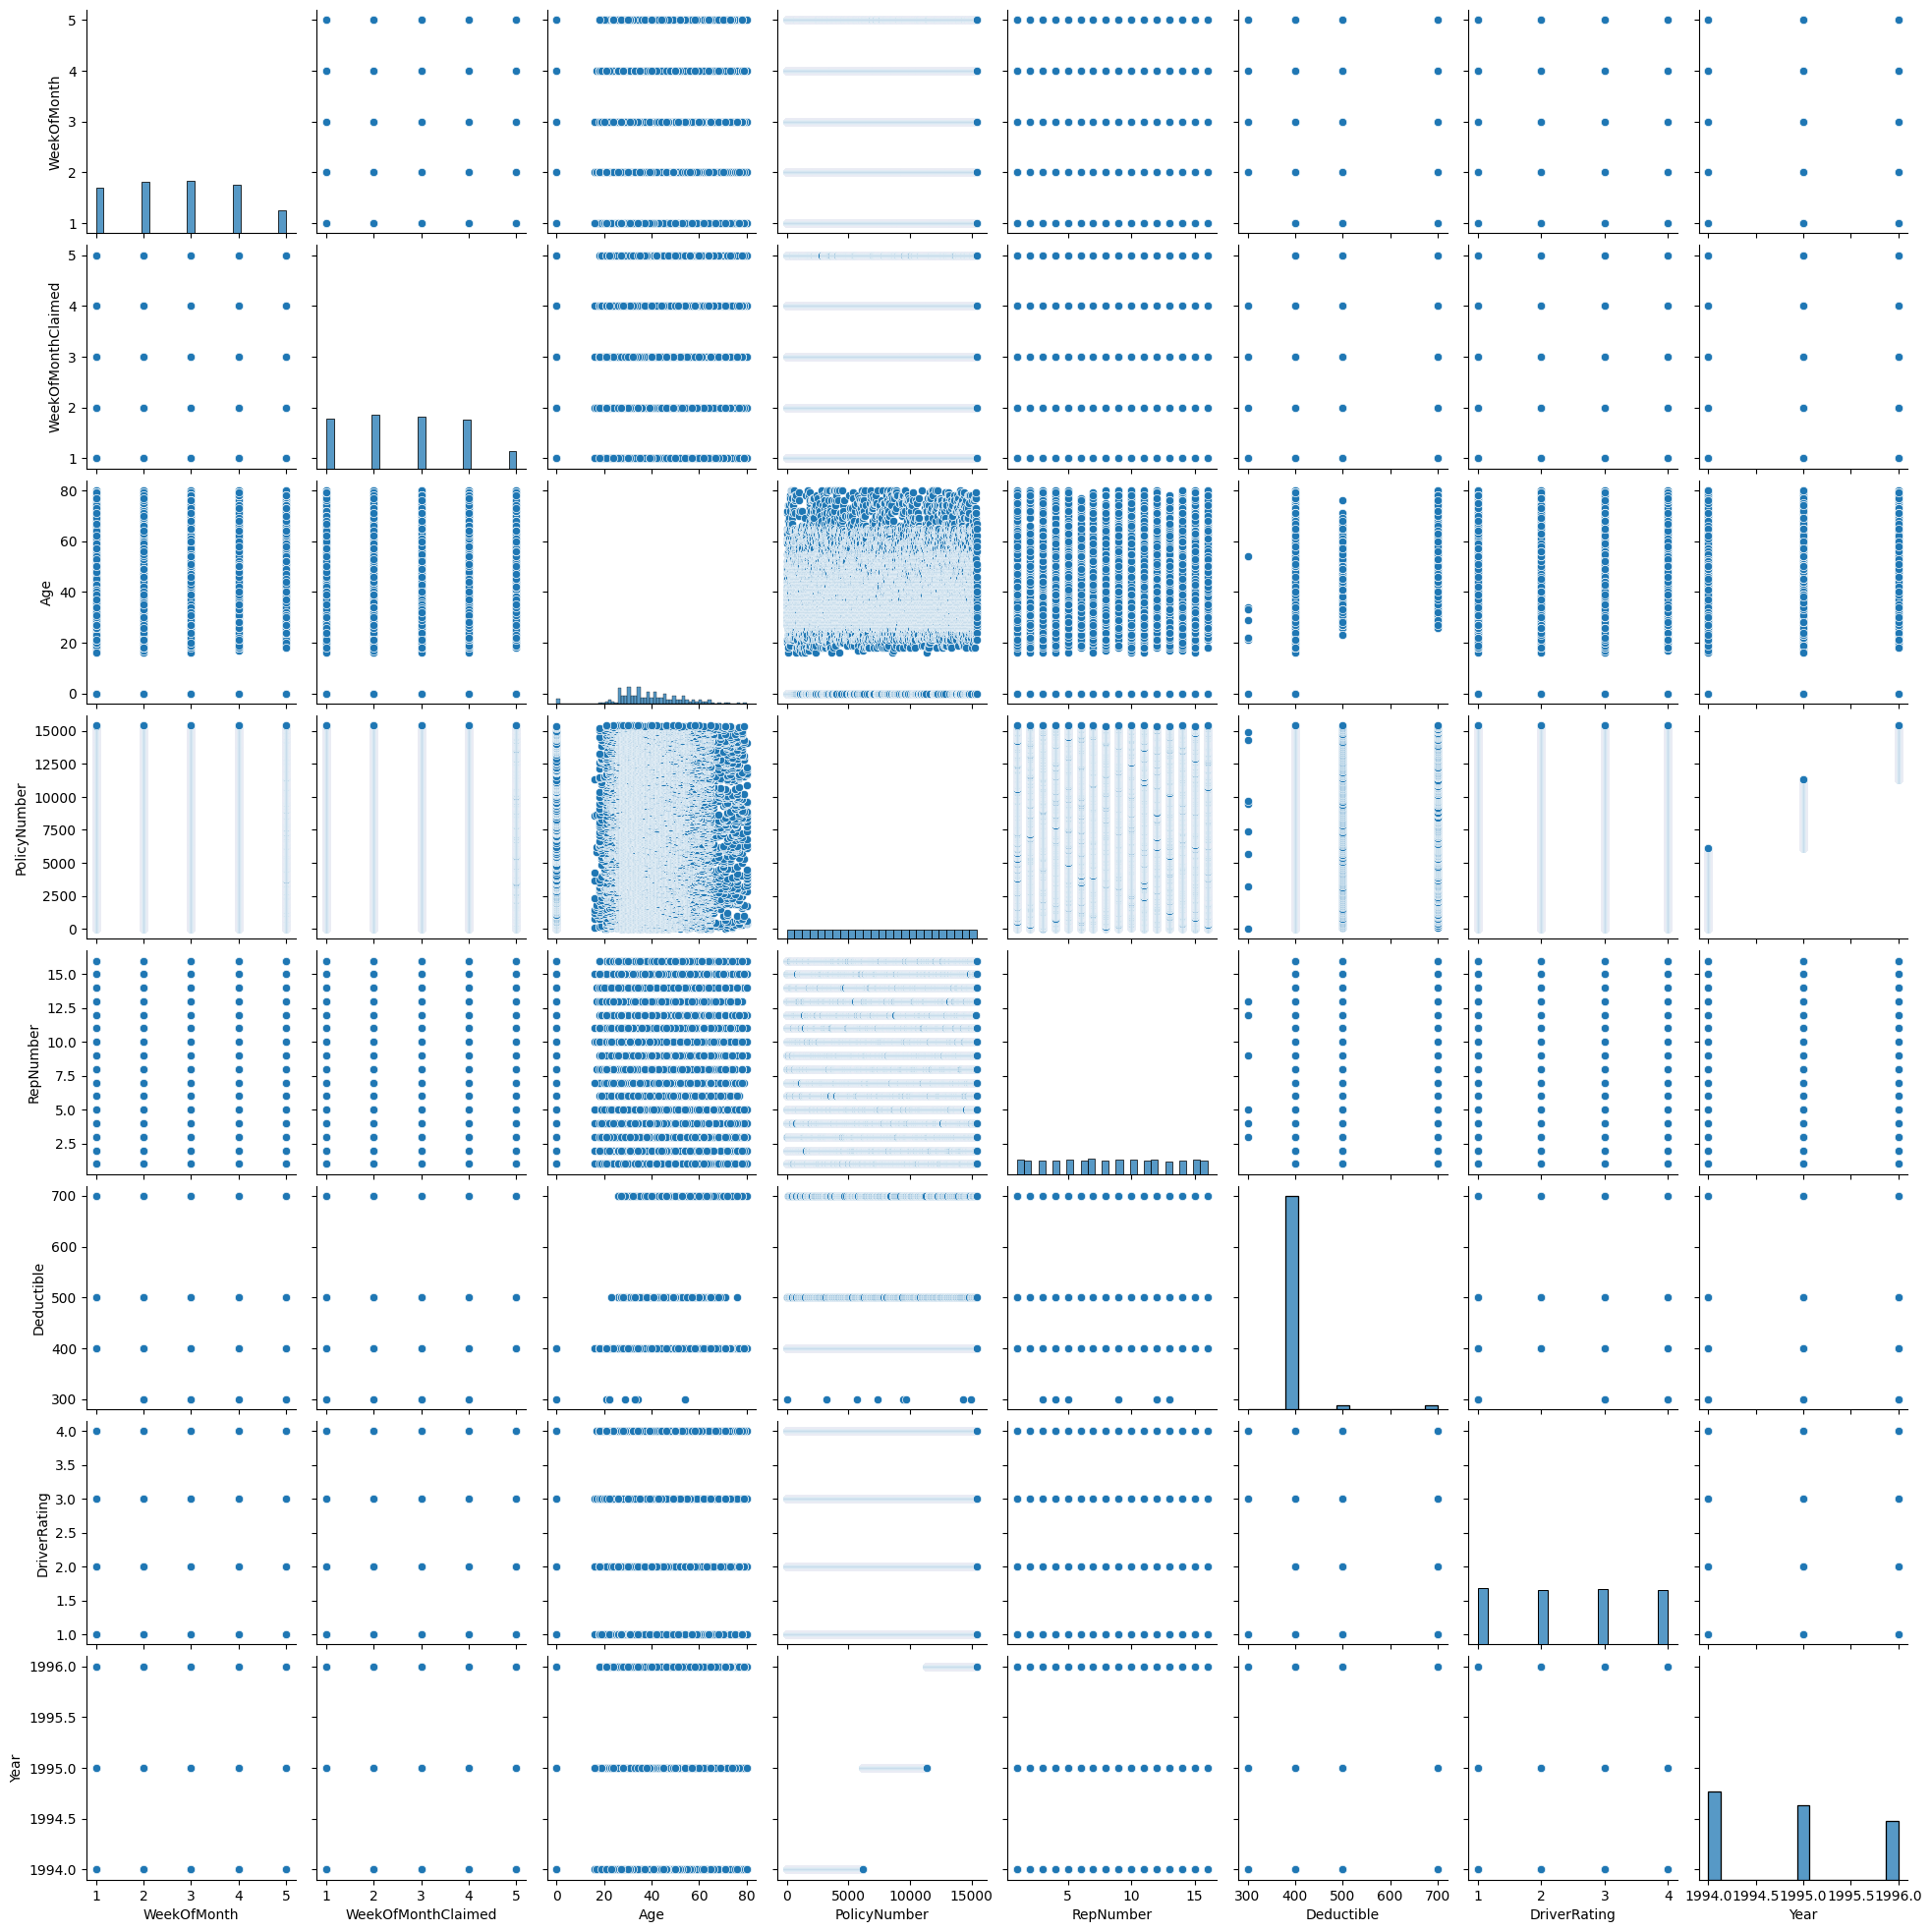

In [5]:
sns.pairplot(carclaims)

In [6]:
carclaims.PolicyNumber.size == carclaims.PolicyNumber.unique().size

True

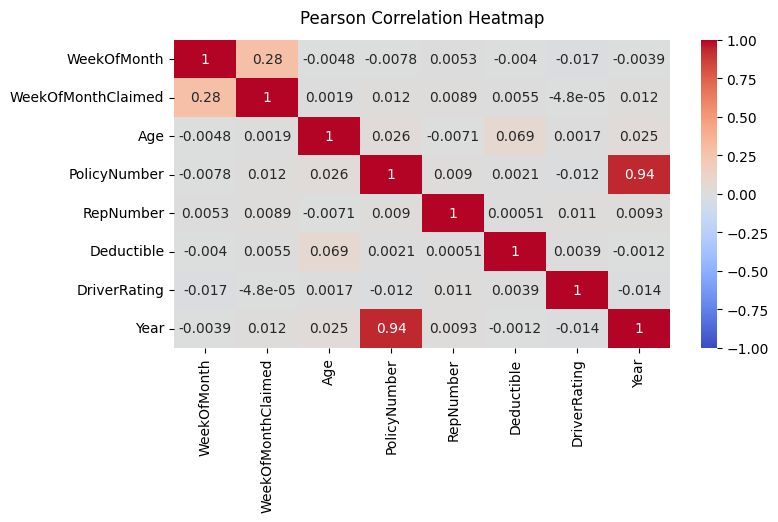

In [7]:
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(carclaims.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=plt.cm.coolwarm)
heatmap.set_title('Pearson Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

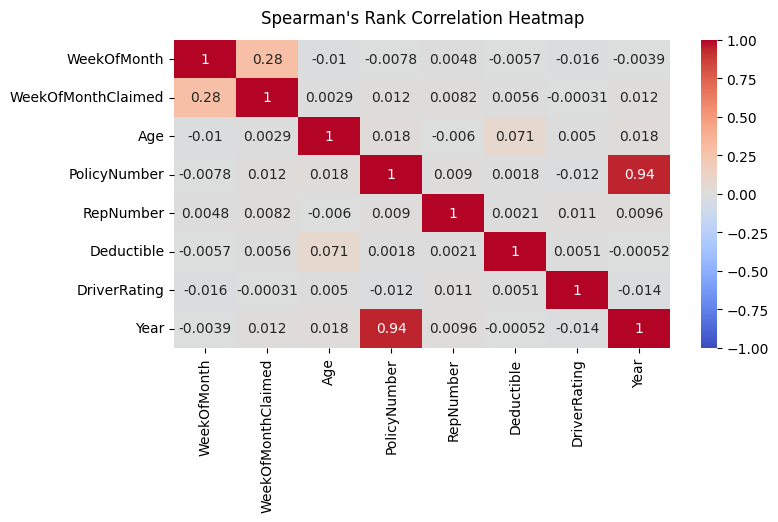

In [8]:
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(carclaims.corr('spearman', numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=plt.cm.coolwarm)
heatmap.set_title('Spearman\'s Rank Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [39]:
numerical_columns = []
categorical_columns = []

for col in carclaims.columns:
    if carclaims[col].dtype == 'object' and col != 'FraudFound':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

print(f'Categorical: {categorical_columns}')
print(f'Numerical: {numerical_columns}')

Categorical: ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'BasePolicy']
Numerical: ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year', 'FraudFound']


In [40]:
# chi2_contingency
chi2_values = []

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            chi2, p, d, expected = chi2_contingency(pd.crosstab(carclaims[col1], carclaims[col2]))
            chi2_values.append([col1, col2, chi2, np.round(p, 3), d, expected])
            
chi2_values = pd.DataFrame(chi2_values, columns=['Column 1', 'Column 2', 'Chi2', 'Chi2 p-value', 'dof', 'Expected'])


chi2_pvalue_mat = chi2_values.pivot(index='Column 1', columns='Column 2', values='Chi2 p-value')


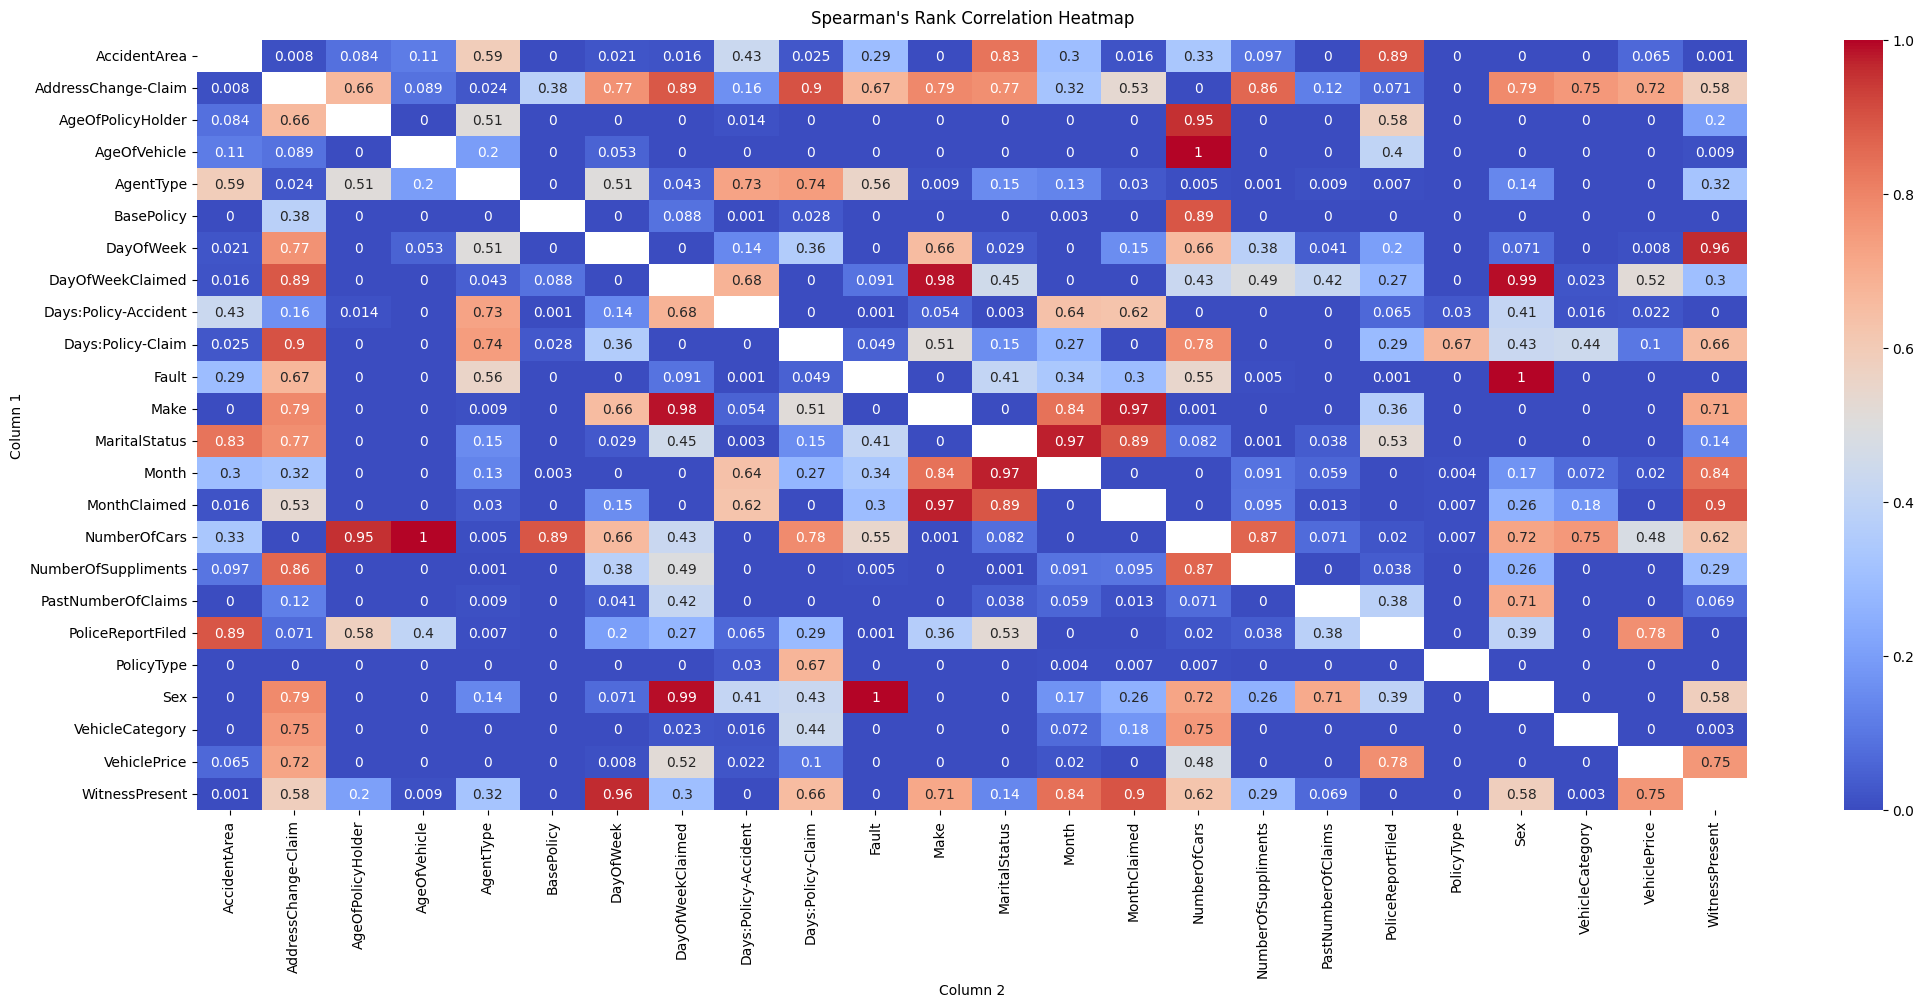

In [41]:
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(chi2_pvalue_mat, vmin=-0, vmax=1, annot=True, cmap=plt.cm.coolwarm)
heatmap.set_title('Spearman\'s Rank Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [42]:
chi2_values

,Column 1,Column 2,Chi2,Chi2 p-value,dof,Expected
0,Month,DayOfWeek,201.175171,0.000,66,"[[202.95719844357976, 217.15175097276264, 164...."
1,Month,Make,178.465772,0.837,198,"[[39.18028534370947, 1.245136186770428, 139.53..."
2,Month,AccidentArea,12.934646,0.298,11,"[[132.6485084306096, 1147.3514915693904], [116..."
3,Month,DayOfWeekClaimed,199.447363,0.000,77,"[[0.08300907911802853, 207.27367055771725, 311..."
4,Month,MonthClaimed,94726.234141,0.000,132,"[[0.08300907911802853, 105.50453955901426, 93...."
...,...,...,...,...,...,...
547,BasePolicy,WitnessPresent,23.870891,0.000,2,"[[4423.898638132296, 25.10136186770428], [5928..."
548,BasePolicy,AgentType,106.991512,0.000,2,"[[4379.466342412451, 69.53365758754863], [5868..."
549,BasePolicy,NumberOfSuppliments,43.597495,0.000,6,"[[718.129766536965, 581.9476653696498, 1115.71..."
550,BasePolicy,AddressChange-Claim,8.545505,0.382,8,"[[49.04863813229572, 83.95972762645914, 182.05..."


In [58]:
carclaims_factorized = carclaims.apply(lambda x: pd.factorize(x, sort=True)[0] if x.dtype == 'object' else x)

In [59]:
carclaims_factorized

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,2,5,6,6,1,6,5,1,0,2,21,0,5,1,5,1,12,300,1,3,2,3,1,3,0,0,0,3,0,2,1994,2,0
1,4,3,6,6,1,2,5,4,1,2,34,0,4,1,5,2,15,400,4,3,2,3,4,4,1,0,0,3,3,0,1994,1,0
2,10,5,0,6,1,5,10,2,1,1,47,0,4,1,5,3,7,400,3,3,2,0,5,6,0,0,0,3,3,0,1994,1,0
3,6,2,2,17,0,1,6,1,1,1,65,1,2,1,0,4,4,400,2,3,2,0,6,7,1,0,0,2,3,0,1994,2,0
4,4,5,1,6,1,6,4,2,0,2,27,1,4,1,5,5,3,400,1,3,2,3,3,4,0,0,0,3,3,0,1994,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,35,0,1,0,0,15416,5,400,4,3,2,1,4,4,0,0,0,3,3,0,1996,1,1
15416,9,5,4,13,1,1,3,1,1,1,30,0,2,1,1,15417,11,400,3,3,2,2,4,4,0,0,0,2,3,2,1996,2,0
15417,9,5,4,17,0,1,3,1,1,2,24,0,1,0,0,15418,4,400,4,3,2,2,3,3,0,0,0,0,3,0,1996,1,1
15418,2,1,1,17,1,5,3,2,0,1,34,1,0,0,0,15419,6,400,4,3,2,3,0,4,0,0,0,2,3,0,1996,0,0


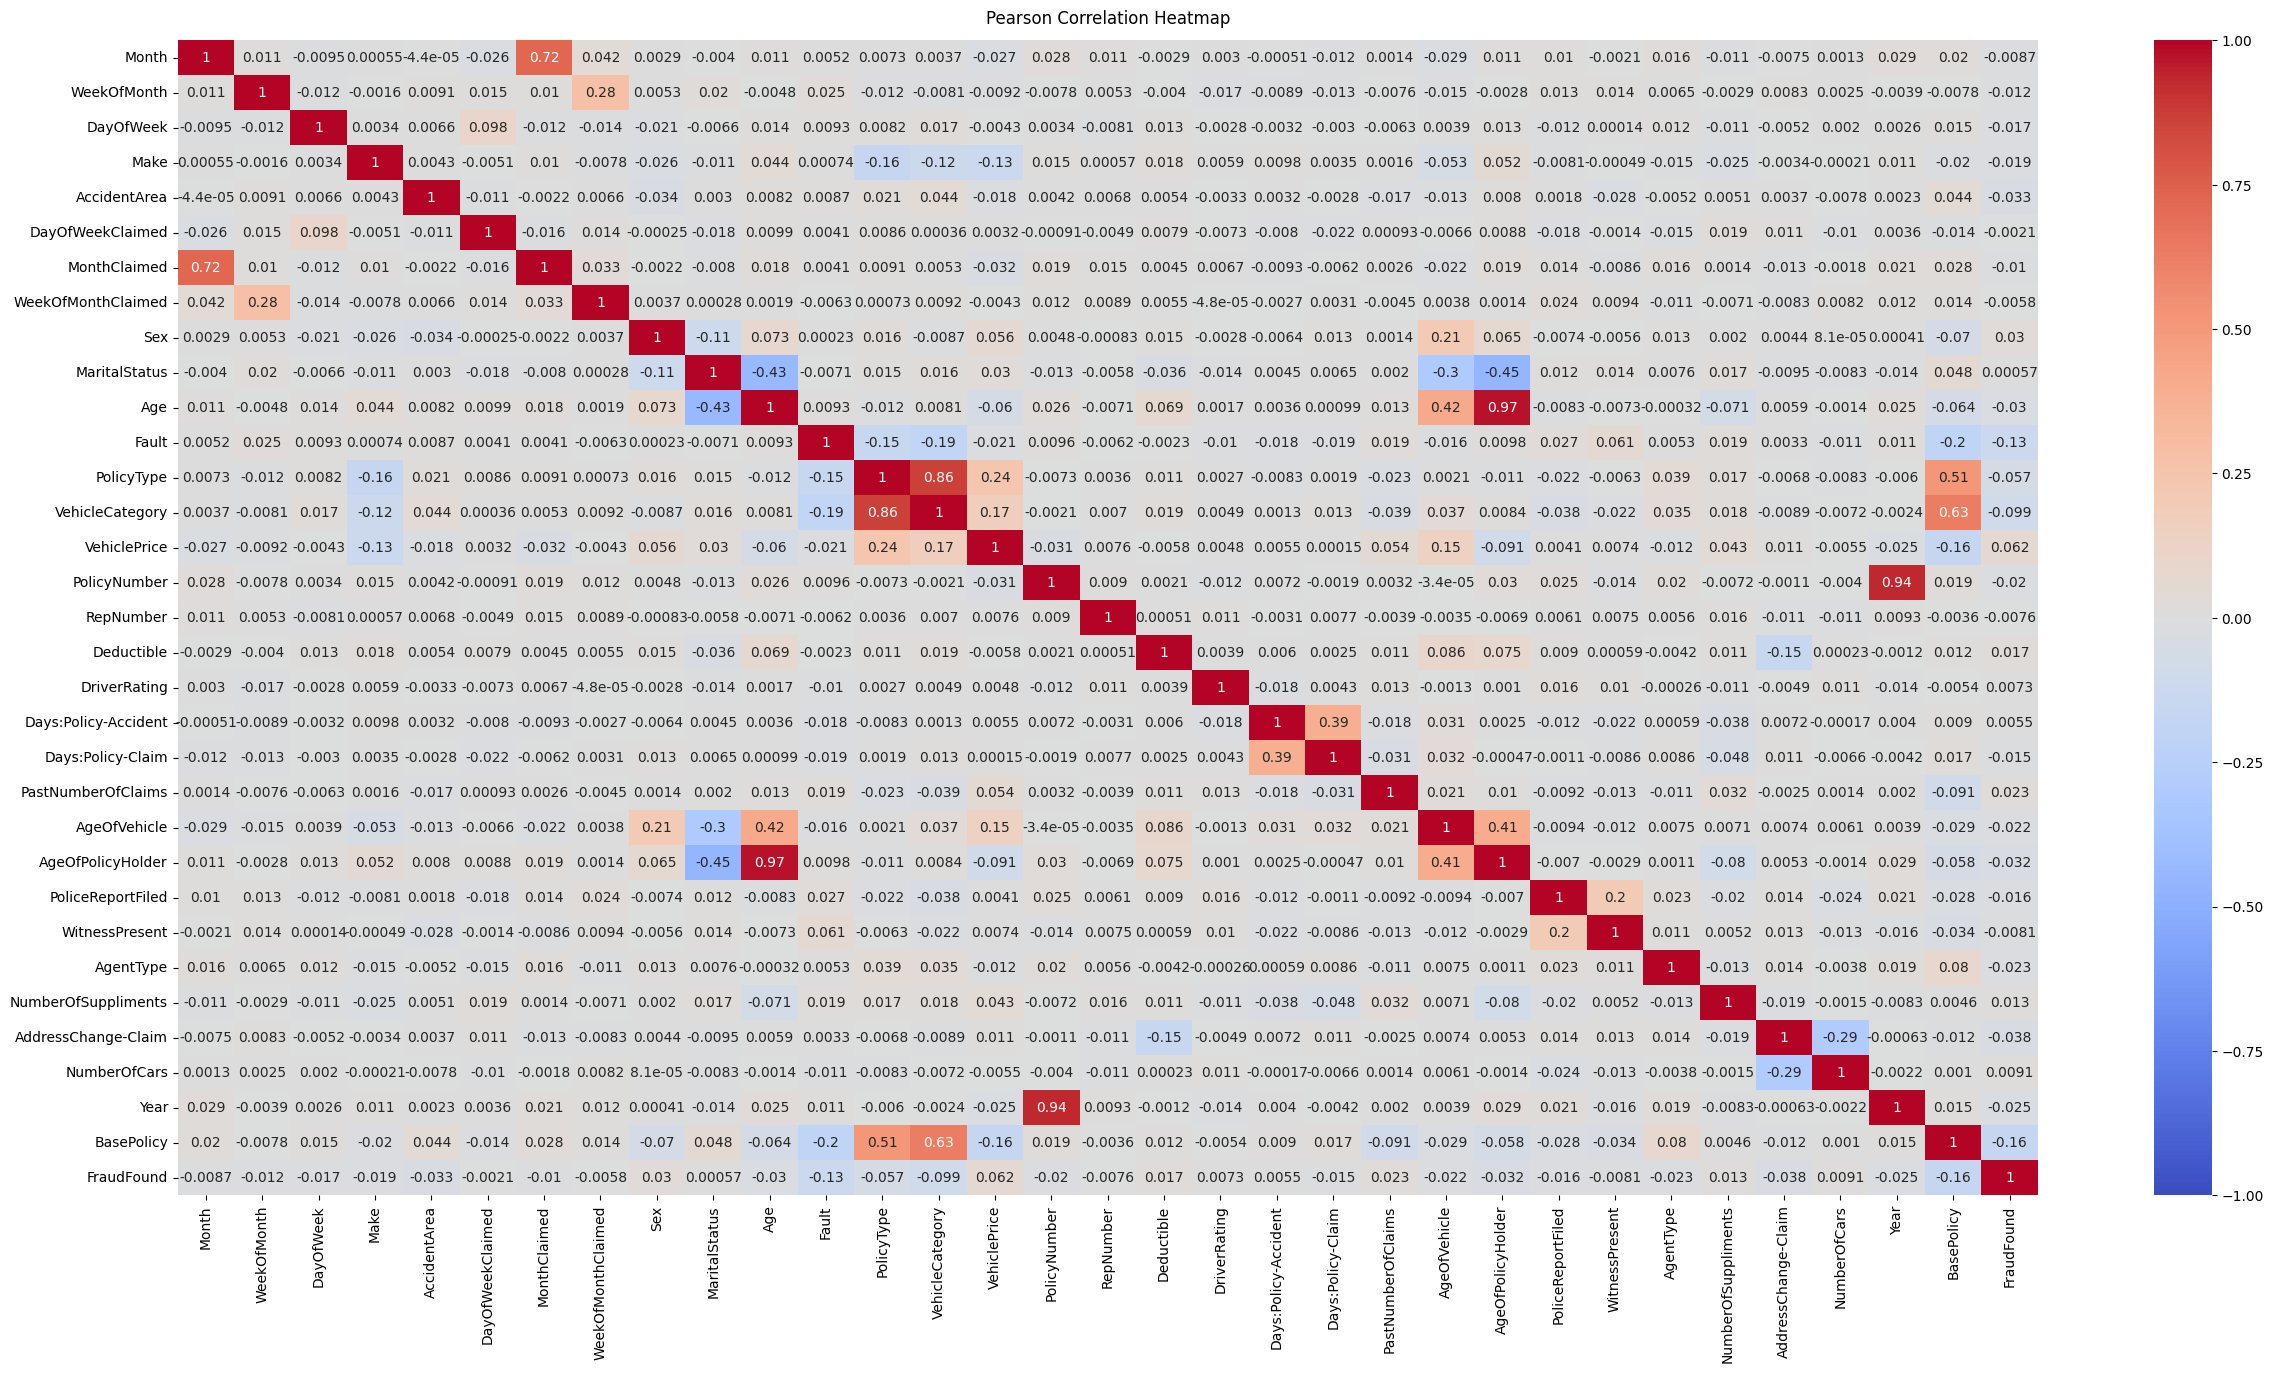

In [60]:
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(carclaims_factorized.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=plt.cm.coolwarm)
heatmap.set_title('Pearson Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [56]:
np.sort(carclaims['AgeOfPolicyHolder'].unique())

array(['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35',
       '36 to 40', '41 to 50', '51 to 65', 'over 65'], dtype=object)

In [57]:
f_oneway(
    carclaims["Age"][carclaims["AgeOfPolicyHolder"] == "16 to 17"],
    carclaims["Age"][carclaims["AgeOfPolicyHolder"] == "18 to 20"],
    carclaims["Age"][carclaims["AgeOfPolicyHolder"] == "21 to 25"],
    carclaims["Age"][carclaims["AgeOfPolicyHolder"] == "26 to 30"],
    carclaims["Age"][carclaims["AgeOfPolicyHolder"] == "31 to 35"],
    carclaims["Age"][carclaims["AgeOfPolicyHolder"] == "36 to 40"],
    carclaims["Age"][carclaims["AgeOfPolicyHolder"] == "41 to 50"],
    carclaims["Age"][carclaims["AgeOfPolicyHolder"] == "51 to 65"],
    carclaims["Age"][carclaims["AgeOfPolicyHolder"] == "over 65"],
)

F_onewayResult(statistic=41479.141037740126, pvalue=0.0)

KeyError: False